## Production

In [107]:
import pandas as pd #this imports pandas as pd to shorten function calls
print(pd.__version__)
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import re # find digits in string

1.3.4


In [130]:
production_df = pd.read_csv('tobacco_production.csv')
#production_df.head()
production_df.shape

(1208, 5)

In [129]:
production_df['Value Footnotes'].value_counts()
incomplete_coverage_cols = production_df.loc[production_df['Value Footnotes']=='4']
#print(incomplete_coverage_cols)
clean_production_df = production_df.drop(incomplete_coverage_cols.index.tolist())
clean_production_df.shape
#removed cols with incomplete coverage

(1203, 5)

In [133]:
tobacco_use_ww = pd.read_csv("tobacco_use_ww.csv")
SEA_Countries = tobacco_use_ww[tobacco_use_ww["ParentLocation"]=="South-East Asia"]["Location"].unique()[1:]
SEA_Countries_Code = tobacco_use_ww[tobacco_use_ww["ParentLocation"]=="South-East Asia"]["SpatialDimValueCode"].unique()[1:]
print(SEA_Countries)

['Timor-Leste' 'India' 'Nepal' 'Bangladesh' 'Sri Lanka' 'Myanmar'
 'Thailand' 'Indonesia']


In [155]:
#clean_production_df.head()
#clean_production_df['Country or Area'].unique()
#finding just south east asia countries
sea_production = pd.DataFrame()
print(sea_production)
for country in SEA_Countries:
    sea_production = sea_production.append(clean_production_df[clean_production_df['Country or Area']==country])
sea_production.head();

Empty DataFrame
Columns: []
Index: []


In [158]:
#split mil usd and metric tons measurements
mil_usd = sea_production[sea_production['Unit']=='Mil. USD']
tons = sea_production[sea_production['Unit']=='Metric tons']
tons.head();

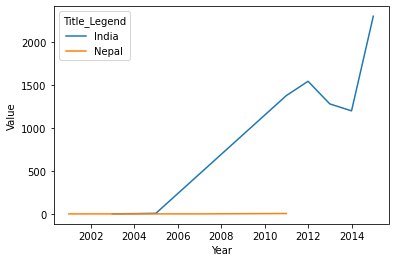

In [180]:
#print(mil_usd.shape, tons.shape)
#print(mil_usd.head(11))
sns.lineplot(data = mil_usd, x = 'Year', y = 'Value', hue = "Country or Area", legend = "full")
plt.legend(labels=mil_usd['Country or Area'].unique(), title = "Title_Legend")

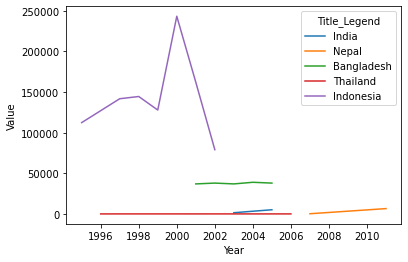

In [181]:
#print(tons.head(27))
sns.lineplot(data = tons, x = 'Year', y = 'Value', hue = "Country or Area", legend = "full")
plt.legend(labels=tons['Country or Area'].unique(), title = "Title_Legend")

## Death Rates Smoking Age

In [1]:
import pandas as pd #this imports pandas as pd to shorten function calls
print(pd.__version__)
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import re # find digits in string

1.3.4


In [8]:
original_df = pd.read_csv('death_rates_smoking_age.csv')
#removing under_5 and 5_14 cols since they don't smoke
clean_df = original_df.drop(columns = ['Under_5', '5_14'])
clean_df.head(10)

,Entity,Code,Year,All_ages,50_69,15_49,70_plus
0,Afghanistan,AFG,1990,63.895905,267.230009,16.589519,679.006755
1,Afghanistan,AFG,1991,61.846347,266.975516,15.456913,677.617648
2,Afghanistan,AFG,1992,53.436511,266.430053,12.767999,679.505810
3,Afghanistan,AFG,1993,47.044347,267.969428,11.000425,683.973588
4,Afghanistan,AFG,1994,45.799808,272.403687,10.738020,691.007773
5,Afghanistan,AFG,1995,44.109036,273.634237,10.161701,691.828857
6,Afghanistan,AFG,1996,42.616425,274.834193,10.067977,693.401558
7,Afghanistan,AFG,1997,41.579362,277.037448,10.224704,696.796549
8,Afghanistan,AFG,1998,40.860275,279.855021,10.520466,700.286019
9,Afghanistan,AFG,1999,41.321832,283.107385,11.370900,703.955623


In [22]:
for col in clean_df:
    print(clean_df[col].value_counts())
    print(len(clean_df[col].unique()))
    print()

#231 countries, with 28 entries each, an entry for each year

Afghanistan                     28
Niger                           28
North Africa and Middle East    28
North America                   28
North Korea                     28
                                ..
Greenland                       28
Grenada                         28
Guam                            28
Guatemala                       28
Zimbabwe                        28
Name: Entity, Length: 231, dtype: int64
231

AFG    28
NZL    28
NER    28
NGA    28
PRK    28
       ..
GHA    28
GRC    28
GRL    28
GRD    28
ZWE    28
Name: Code, Length: 196, dtype: int64
197

1990    231
1991    231
2016    231
2015    231
2014    231
2013    231
2012    231
2011    231
2010    231
2009    231
2008    231
2007    231
2006    231
2005    231
2004    231
2003    231
2002    231
2001    231
2000    231
1999    231
1998    231
1997    231
1996    231
1995    231
1994    231
1993    231
1992    231
2017    231
Name: Year, dtype: int64
28

63.895905     1
120.341835    1
102.709182    1
103.

''

In [88]:
#top avg deaths all_ages for each country, scatter
countries = clean_df['Entity'].unique()
allAges = clean_df['All_ages']
#type(countries)
deaths = np.empty([231, 2])
id = 0
for i in range(0, 28*231, 28):
    avg = np.average(allAges[i:i+28])
    deaths[id] = (id, avg)
    id+=1
#sns.scatterplot(countries, deaths)
sorted_deaths = np.sort(deaths, axis=0)
#print(sorted_deaths)
top_ten = sorted_deaths[221:231, 1]
print(top_ten)
ten_countries = np.empty(10)
for i in range(10):
    where = np.where(deaths == top_ten[i])
    #type(where) #tuple
    ten_countries = np.append(ten_countries, countries[where[0]])
print(ten_countries)
eastEurope = clean_df[clean_df['Entity'] == 'Eastern Europe']
#print(eastEurope)
print(np.average(eastEurope['All_ages']))

[241.97618792 246.39178702 247.12896622 252.65214713 256.87685697
 264.33052446 277.56118766 280.11040873 293.32363521 293.77876585]
[241.9761879164584 246.39178702416498 247.12896622441218
 252.65214712841447 256.8768569748962 264.33052446149406 277.5611876632202
 280.11040872943875 293.32363521272777 293.7787658493841 'Eastern Europe'
 'Wales' 'Croatia' 'Serbia' 'Belarus' 'Ukraine' 'Denmark' 'Scotland'
 'Bulgaria' 'Hungary']
241.9761879164584


## 5 Countries All_ages deaths over 28 years

/Users/liu21d/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/liu21d/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/liu21d/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


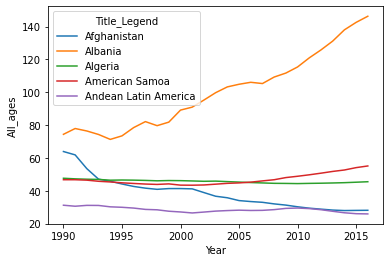

In [32]:
#graph deaths per 100,000 people from smoking over 28 years for Afghanistan
for i in range(0, 28*5, 28):
    afg = clean_df[i:i+27]
    sns.lineplot(afg['Year'], afg['All_ages'], legend = "full")
plt.legend(labels=clean_df['Entity'].unique()[0:5], title = "Title_Legend")

/Users/liu21d/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/liu21d/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/liu21d/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


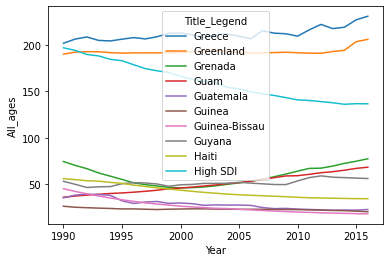

In [104]:
for i in range(28*80, 28*90, 28):
    afg = clean_df[i:i+27]
    sns.lineplot(afg['Year'], afg['All_ages'], legend = "full")
plt.legend(labels=clean_df['Entity'].unique()[80:90], title = "Title_Legend")

In [ ]:
#Albania, Bosnia and Herzegovina, China, Dominican Republic, East Asia, Georgia, Fiji, Greece, Greenland, Guam